<center><h1>EDA and Data Preprocessing</h1></center>

<center><h3>This notebook provides an exploratory data analysis on the arXiv datase</h3>
<h4>Exploratory Data Analysis (EDA) is the process of exploring a dataset and getting an understanding of its main characteristics. </h4></center>

![img](https://datos.gob.es/sites/default/files/u322/grafico.jpg)

## IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import ast

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
PATH_DATA_BASE = Path.cwd().parent / "data"

<center><h3>Exploratory Data Analysis</h3></center>

## Load the data

In [3]:
pd.set_option('display.max_colwidth', None)
arxiv_data = pd.read_csv(PATH_DATA_BASE / "data.csv")

## Top 5 Data

In [4]:
arxiv_data.head()

,titles,abstracts,terms,urls,ids
0,DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation,"Transformers have recently gained attention in the computer vision domain due\nto their ability to model long-range dependencies. However, the self-attention\nmechanism, which is the core part of the Transformer model, usually suffers\nfrom quadratic computational complexity with respect to the number of tokens.\nMany architectures attempt to reduce model complexity by limiting the\nself-attention mechanism to local regions or by redesigning the tokenization\nprocess. In this paper, we propose DAE-Former, a novel method that seeks to\nprovide an alternative perspective by efficiently designing the self-attention\nmechanism. More specifically, we reformulate the self-attention mechanism to\ncapture both spatial and channel relations across the whole feature dimension\nwhile staying computationally efficient. Furthermore, we redesign the skip\nconnection path by including the cross-attention module to ensure the feature\nreusability and enhance the localization power. Our method outperforms\nstate-of-the-art methods on multi-organ cardiac and skin lesion segmentation\ndatasets without requiring pre-training weights. The code is publicly available\nat https://github.com/mindflow-institue/DAEFormer.",['cs.CV'],http://arxiv.org/abs/2212.13504v3,2212.13504v3
1,Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling,"The missing modality issue is critical but non-trivial to be solved by\nmulti-modal models. Current methods aiming to handle the missing modality\nproblem in multi-modal tasks, either deal with missing modalities only during\nevaluation or train separate models to handle specific missing modality\nsettings. In addition, these models are designed for specific tasks, so for\nexample, classification models are not easily adapted to segmentation tasks and\nvice versa. In this paper, we propose the Shared-Specific Feature Modelling\n(ShaSpec) method that is considerably simpler and more effective than competing\napproaches that address the issues above. ShaSpec is designed to take advantage\nof all available input modalities during training and evaluation by learning\nshared and specific features to better represent the input data. This is\nachieved from a strategy that relies on auxiliary tasks based on distribution\nalignment and domain classification, in addition to a residual feature fusion\nprocedure. Also, the design simplicity of ShaSpec enables its easy adaptation\nto multiple tasks, such as classification and segmentation. Experiments are\nconducted on both medical image segmentation and computer vision\nclassification, with results indicating that ShaSpec outperforms competing\nmethods by a large margin. For instance, on BraTS2018, ShaSpec improves the\nSOTA by more than 3% for enhancing tumour, 5% for tumour core and 3% for whole\ntumour.",['cs.CV'],http://arxiv.org/abs/2307.14126v1,2307.14126v1
2,Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation,"High-accuracy Dichotomous Image Segmentation (DIS) aims to pinpoint\ncategory-agnostic foreground objects from natural scenes. The main challenge\nfor DIS involves identifying the highly accurate dominant area while rendering\ndetailed object structure. However, directly using a general encoder-decoder\narchitecture may result in an oversupply of high-level features and neglect the\nshallow spatial information necessary for partitioning meticulous structures.\nTo fill this gap, we introduce a novel Unite-Divide-Unite Network (UDUN} that\nrestructures and bipartitely arranges complementary features to simultaneously\nboost the effectiveness of trunk and structure identification. The proposed\nUDUN proceeds from several strengths. First, a dual-size input feeds into the\nshared backbone to produce more holistic and detailed features while keeping\nthe model lightweight. Secon

In [5]:
arxiv_data.drop(index = 77860 , inplace=True)

In [6]:
arxiv_data.drop(index = 91911 , inplace=True)

#### Length of the Data

In [7]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 93803 rows in the dataset.


#### Checking the shape and size of the data

In [8]:
arxiv_data.size

469015

In [9]:
arxiv_data.shape

(93803, 5)

In [10]:
arxiv_data.memory_usage()

Index        750424
titles       750424
abstracts    750424
terms        750424
urls         750424
ids          750424
dtype: int64

<h4>Observation:</h4>
<h5>The data has 93805 rows and 5 columns, which means there are 93805 research papers in the dataset. The data takes about 3.6 MB of memory, which is not too large. Each column takes about 750 KB of memory, except for the index which takes only 128 bytes.</h5>

###  Checking the data types and missing values

In [11]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93803 entries, 0 to 93804
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     93803 non-null  object
 1   abstracts  93803 non-null  object
 2   terms      93803 non-null  object
 3   urls       93803 non-null  object
 4   ids        93803 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [12]:
arxiv_data.isnull().sum()

titles       0
abstracts    0
terms        0
urls         0
ids          0
dtype: int64

#### Observation: The data types of all the columns are object, which means they are strings. There are no missing values in the data, which is good. We don’t need to deal with any imputation or deletion of null values.

Note that the 'terms' column is a string representation of a list. We are converting it to a list using the ast.literal_eval function.

In [13]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
arxiv_data.head()

,titles,abstracts,terms,urls,ids
0,DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation,"Transformers have recently gained attention in the computer vision domain due\nto their ability to model long-range dependencies. However, the self-attention\nmechanism, which is the core part of the Transformer model, usually suffers\nfrom quadratic computational complexity with respect to the number of tokens.\nMany architectures attempt to reduce model complexity by limiting the\nself-attention mechanism to local regions or by redesigning the tokenization\nprocess. In this paper, we propose DAE-Former, a novel method that seeks to\nprovide an alternative perspective by efficiently designing the self-attention\nmechanism. More specifically, we reformulate the self-attention mechanism to\ncapture both spatial and channel relations across the whole feature dimension\nwhile staying computationally efficient. Furthermore, we redesign the skip\nconnection path by including the cross-attention module to ensure the feature\nreusability and enhance the localization power. Our method outperforms\nstate-of-the-art methods on multi-organ cardiac and skin lesion segmentation\ndatasets without requiring pre-training weights. The code is publicly available\nat https://github.com/mindflow-institue/DAEFormer.",[cs.CV],http://arxiv.org/abs/2212.13504v3,2212.13504v3
1,Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling,"The missing modality issue is critical but non-trivial to be solved by\nmulti-modal models. Current methods aiming to handle the missing modality\nproblem in multi-modal tasks, either deal with missing modalities only during\nevaluation or train separate models to handle specific missing modality\nsettings. In addition, these models are designed for specific tasks, so for\nexample, classification models are not easily adapted to segmentation tasks and\nvice versa. In this paper, we propose the Shared-Specific Feature Modelling\n(ShaSpec) method that is considerably simpler and more effective than competing\napproaches that address the issues above. ShaSpec is designed to take advantage\nof all available input modalities during training and evaluation by learning\nshared and specific features to better represent the input data. This is\nachieved from a strategy that relies on auxiliary tasks based on distribution\nalignment and domain classification, in addition to a residual feature fusion\nprocedure. Also, the design simplicity of ShaSpec enables its easy adaptation\nto multiple tasks, such as classification and segmentation. Experiments are\nconducted on both medical image segmentation and computer vision\nclassification, with results indicating that ShaSpec outperforms competing\nmethods by a large margin. For instance, on BraTS2018, ShaSpec improves the\nSOTA by more than 3% for enhancing tumour, 5% for tumour core and 3% for whole\ntumour.",[cs.CV],http://arxiv.org/abs/2307.14126v1,2307.14126v1
2,Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation,"High-accuracy Dichotomous Image Segmentation (DIS) aims to pinpoint\ncategory-agnostic foreground objects from natural scenes. The main challenge\nfor DIS involves identifying the highly accurate dominant area while rendering\ndetailed object structure. However, directly using a general encoder-decoder\narchitecture may result in an oversupply of high-level features and neglect the\nshallow spatial information necessary for partitioning meticulous structures.\nTo fill this gap, we introduce a novel Unite-Divide-Unite Network (UDUN} that\nrestructures and bipartitely arranges complementary features to simultaneously\nboost the effectiveness of trunk and structure identification. The proposed\nUDUN proceeds from several strengths. First, a dual-size input feeds into the\nshared backbone to produce more holistic and detailed features while keeping\nthe model lightweight. Second, a

#### Distribution of Terms

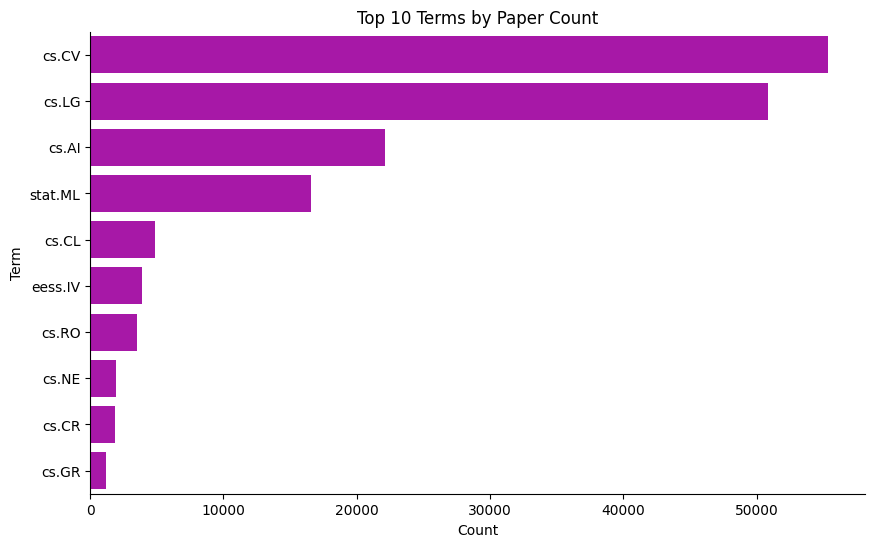

In [14]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='m' , saturation=0.75)

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

## Check for Duplicates

In [15]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 28092 duplicate titles.


Real-world data is noisy. One of the most commonly observed source of noise is data duplication. Here we notice that our initial dataset has got about 28k duplicate entries.

## Word Cloud of Titles

In [16]:
# !pip install wordcloud

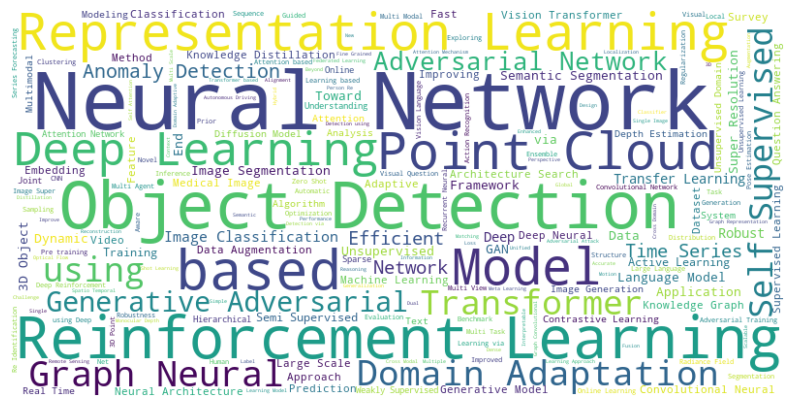

In [17]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Lets drop the duplicate value and proceed

In [18]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()] #  It returns a new DataFrame that only contains the rows that are not duplicates.

print(f"Now there are {len(arxiv_data)}  rows in the dataset")

Now there are 65711  rows in the dataset


## Saved Filtered Data


In [19]:
arxiv_data.to_csv(PATH_DATA_BASE / 'filtered_data.csv' ,index=False)


<CENTER><h1>Approaches</h1>

<h2>We will be testing two approaches to recommend papers to a user.</h2>

<h4>1. The first approach is a content-based approach, where we will be recommending papers based on the similarity of their titles.</h4>
<h4>2. The second approach is also a content-based approach but we will be recommending papers based on the similarity of their abstract.</h4></CENTER>

# 1. CONTENT BASED APPROACH USING TITLES

### Lets begin exploring the first approach 

#### Since we are using Titles to reccomend the similar paper we will be droping rest of the columns from the data

In [20]:
title_dataset = arxiv_data.drop(columns=['abstracts'])

In [21]:
title_dataset.head(10)

,titles,terms,urls,ids
0,DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2212.13504v3,2212.13504v3
1,Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling,[cs.CV],http://arxiv.org/abs/2307.14126v1,2307.14126v1
2,Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation,[cs.CV],http://arxiv.org/abs/2307.14052v1,2307.14052v1
3,MDViT: Multi-domain Vision Transformer for Small Medical Image Segmentation Datasets,[cs.CV],http://arxiv.org/abs/2307.02100v2,2307.02100v2
4,Learning Transferable Object-Centric Diffeomorphic Transformations for Data Augmentation in Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2307.13645v1,2307.13645v1
5,"Image Segmentation Keras : Implementation of Segnet, FCN, UNet, PSPNet and other models in Keras",[cs.CV],http://arxiv.org/abs/2307.13215v1,2307.13215v1
6,Semi-Supervised Medical Image Segmentation with Co-Distribution Alignment,[cs.CV],http://arxiv.org/abs/2307.12630v1,2307.12630v1
7,SwinMM: Masked Multi-view with Swin Transformers for 3D Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2307.12591v1,2307.12591v1
8,SL: Stable Learning in Source-Free Domain Adaption for Medical Image Segmentation,"[cs.CV, cs.AI]",http://arxiv.org/abs/2307.12580v1,2307.12580v1
9,SwIPE: Efficient and Robust Medical Image Segmentation with Implicit Patch Embeddings,[cs.CV],http://arxiv.org/abs/2307.12429v1,2307.12429v1


### Length of the titles

In [22]:
len(max(title_dataset['titles']))

96

In [23]:
print(f"The maximum length of the title is : {len(max(title_dataset['titles']))}")

The maximum length of the title is : 96


In [24]:
print(f"The minimum length of the title is : {len(min(title_dataset['titles']))}")

The minimum length of the title is : 44


In [25]:
average_length = int(sum(len(title) for title in title_dataset["titles"]) / len(title_dataset["titles"]))

print(f"The average length of the titles is : {average_length}")

The average length of the titles is : 73


In [26]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame. 
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """
    
    # Compute the lengths of all titles
    title_lengths = df[column_name].apply(len)

    # Calculate mean and standard deviation
    mean_length = title_lengths.mean()
    std_length = title_lengths.std()

    # Plot the histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(title_lengths, bins=50, color='b', alpha=0.2)

    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray',
                linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='gray',
                linestyle='--', linewidth=1)

    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()
             [1]*0.9, f"Mean: {mean_length:.2f}", fontsize=10)

    plt.title('Distribution of ' + column_name.capitalize() + ' Lengths')
    plt.xlabel(column_name.capitalize() + ' Length')
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [27]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens 
    and stop words, counts the frequency of each word, and then plots the 10 most common words 
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """
    
    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(12,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')
    
    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

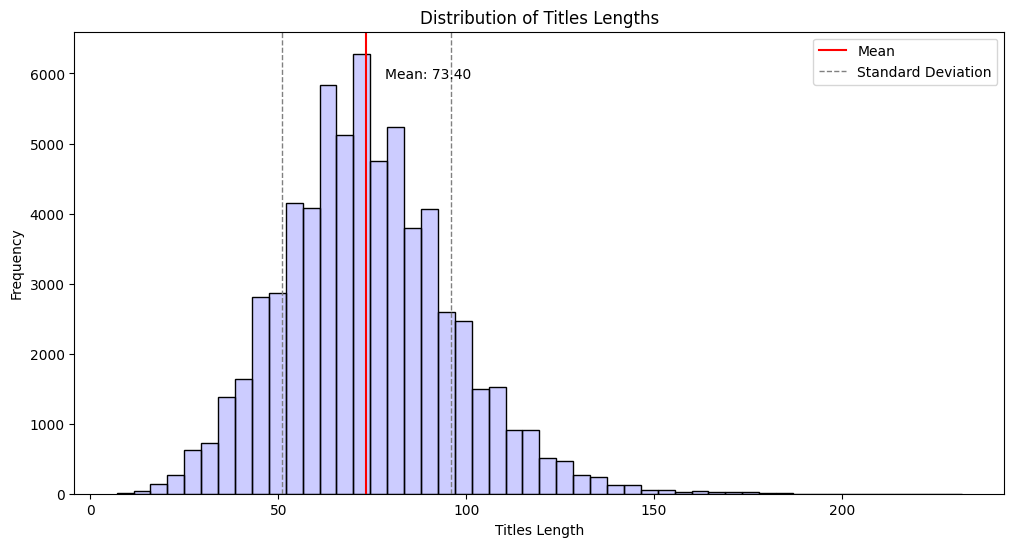

In [28]:
plot_length_distribution(title_dataset, 'titles')

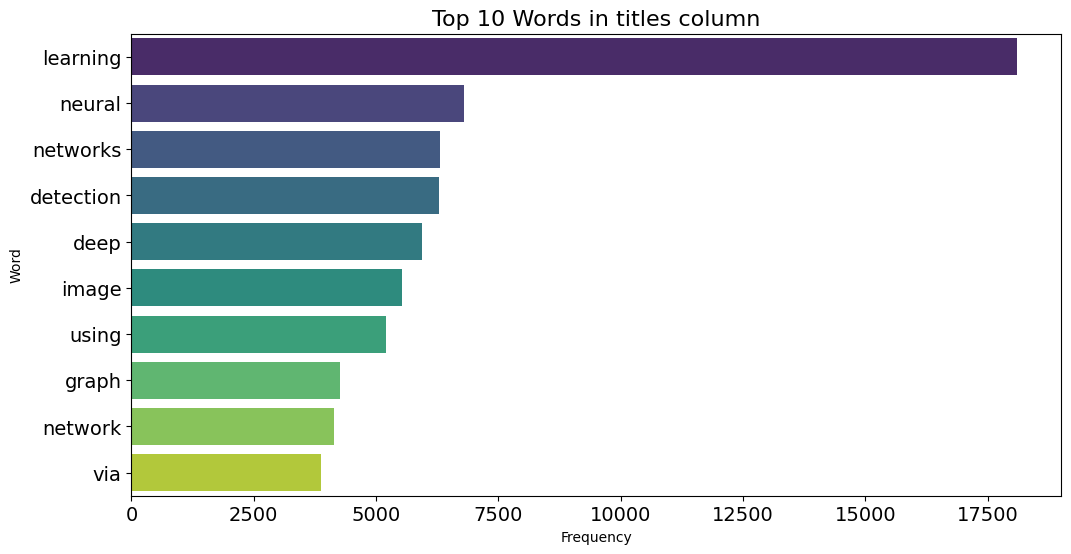

In [29]:
plot_top_words(title_dataset, 'titles')

# 2. CONTENT BASED APPROACH USING ABSTRACTS

##### Since we are using abstracts , we will be droping titles columns 

In [30]:
abstract_dataset = arxiv_data.drop(columns=['titles'])

In [31]:
abstract_dataset.head(10)

,abstracts,terms,urls,ids
0,"Transformers have recently gained attention in the computer vision domain due\nto their ability to model long-range dependencies. However, the self-attention\nmechanism, which is the core part of the Transformer model, usually suffers\nfrom quadratic computational complexity with respect to the number of tokens.\nMany architectures attempt to reduce model complexity by limiting the\nself-attention mechanism to local regions or by redesigning the tokenization\nprocess. In this paper, we propose DAE-Former, a novel method that seeks to\nprovide an alternative perspective by efficiently designing the self-attention\nmechanism. More specifically, we reformulate the self-attention mechanism to\ncapture both spatial and channel relations across the whole feature dimension\nwhile staying computationally efficient. Furthermore, we redesign the skip\nconnection path by including the cross-attention module to ensure the feature\nreusability and enhance the localization power. Our method outperforms\nstate-of-the-art methods on multi-organ cardiac and skin lesion segmentation\ndatasets without requiring pre-training weights. The code is publicly available\nat https://github.com/mindflow-institue/DAEFormer.",[cs.CV],http://arxiv.org/abs/2212.13504v3,2212.13504v3
1,"The missing modality issue is critical but non-trivial to be solved by\nmulti-modal models. Current methods aiming to handle the missing modality\nproblem in multi-modal tasks, either deal with missing modalities only during\nevaluation or train separate models to handle specific missing modality\nsettings. In addition, these models are designed for specific tasks, so for\nexample, classification models are not easily adapted to segmentation tasks and\nvice versa. In this paper, we propose the Shared-Specific Feature Modelling\n(ShaSpec) method that is considerably simpler and more effective than competing\napproaches that address the issues above. ShaSpec is designed to take advantage\nof all available input modalities during training and evaluation by learning\nshared and specific features to better represent the input data. This is\nachieved from a strategy that relies on auxiliary tasks based on distribution\nalignment and domain classification, in addition to a residual feature fusion\nprocedure. Also, the design simplicity of ShaSpec enables its easy adaptation\nto multiple tasks, such as classification and segmentation. Experiments are\nconducted on both medical image segmentation and computer vision\nclassification, with results indicating that ShaSpec outperforms competing\nmethods by a large margin. For instance, on BraTS2018, ShaSpec improves the\nSOTA by more than 3% for enhancing tumour, 5% for tumour core and 3% for whole\ntumour.",[cs.CV],http://arxiv.org/abs/2307.14126v1,2307.14126v1
2,"High-accuracy Dichotomous Image Segmentation (DIS) aims to pinpoint\ncategory-agnostic foreground objects from natural scenes. The main challenge\nfor DIS involves identifying the highly accurate dominant area while rendering\ndetailed object structure. However, directly using a general encoder-decoder\narchitecture may result in an oversupply of high-level features and neglect the\nshallow spatial information necessary for partitioning meticulous structures.\nTo fill this gap, we introduce a novel Unite-Divide-Unite Network (UDUN} that\nrestructures and bipartitely arranges complementary features to simultaneously\nboost the effectiveness of trunk and structure identification. The proposed\nUDUN proceeds from several strengths. First, a dual-size input feeds into the\nshared backbone to produce more holistic and detailed features while keeping\nthe model lightweight. Second, a simple Divide-and-Conquer Module (DCM) is\nproposed to decouple multiscale low- and high-level features into our structure\ndecoder and trunk decoder to obtain structure and trunk information\nrespectively. Moreover, we design a Trunk-Structure Aggregation module (TSA) in\nour 

### LENGTH OF THE ABSTRACTS

In [32]:
abstract_dataset = abstract_dataset.drop(index = 49983 )

In [33]:
abstract_dataset['abstract_length'] = abstract_dataset['abstracts'].apply(len)
print(f"The length of the abstract is : {len(abstract_dataset)}")

The length of the abstract is : 65710


In [34]:
len(abstract_dataset['abstract_length'] > 2700)

65710

In [35]:
min_length = abstract_dataset['abstract_length'].min()
max_length = abstract_dataset['abstract_length'].max()

print('The minimum length of an abstract:', min_length)
print('The maximum length of an abstract:', max_length)

The minimum length of an abstract: 39
The maximum length of an abstract: 2790


In [36]:
average_abstract_length = int(abstract_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")


The average text length of an abstract is 1234 characters.


In [37]:
abstract_dataset

,abstracts,terms,urls,ids,abstract_length
0,"Transformers have recently gained attention in the computer vision domain due\nto their ability to model long-range dependencies. However, the self-attention\nmechanism, which is the core part of the Transformer model, usually suffers\nfrom quadratic computational complexity with respect to the number of tokens.\nMany architectures attempt to reduce model complexity by limiting the\nself-attention mechanism to local regions or by redesigning the tokenization\nprocess. In this paper, we propose DAE-Former, a novel method that seeks to\nprovide an alternative perspective by efficiently designing the self-attention\nmechanism. More specifically, we reformulate the self-attention mechanism to\ncapture both spatial and channel relations across the whole feature dimension\nwhile staying computationally efficient. Furthermore, we redesign the skip\nconnection path by including the cross-attention module to ensure the feature\nreusability and enhance the localization power. Our method outperforms\nstate-of-the-art methods on multi-organ cardiac and skin lesion segmentation\ndatasets without requiring pre-training weights. The code is publicly available\nat https://github.com/mindflow-institue/DAEFormer.",[cs.CV],http://arxiv.org/abs/2212.13504v3,2212.13504v3,1199
1,"The missing modality issue is critical but non-trivial to be solved by\nmulti-modal models. Current methods aiming to handle the missing modality\nproblem in multi-modal tasks, either deal with missing modalities only during\nevaluation or train separate models to handle specific missing modality\nsettings. In addition, these models are designed for specific tasks, so for\nexample, classification models are not easily adapted to segmentation tasks and\nvice versa. In this paper, we propose the Shared-Specific Feature Modelling\n(ShaSpec) method that is considerably simpler and more effective than competing\napproaches that address the issues above. ShaSpec is designed to take advantage\nof all available input modalities during training and evaluation by learning\nshared and specific features to better represent the input data. This is\nachieved from a strategy that relies on auxiliary tasks based on distribution\nalignment and domain classification, in addition to a residual feature fusion\nprocedure. Also, the design simplicity of ShaSpec enables its easy adaptation\nto multiple tasks, such as classification and segmentation. Experiments are\nconducted on both medical image segmentation and computer vision\nclassification, with results indicating that ShaSpec outperforms competing\nmethods by a large margin. For instance, on BraTS2018, ShaSpec improves the\nSOTA by more than 3% for enhancing tumour, 5% for tumour core and 3% for whole\ntumour.",[cs.CV],http://arxiv.org/abs/2307.14126v1,2307.14126v1,1449
2,"High-accuracy Dichotomous Image Segmentation (DIS) aims to pinpoint\ncategory-agnostic foreground objects from natural scenes. The main challenge\nfor DIS involves identifying the highly accurate dominant area while rendering\ndetailed object structure. However, directly using a general encoder-decoder\narchitecture may result in an oversupply of high-level features and neglect the\nshallow spatial information necessary for partitioning meticulous structures.\nTo fill this gap, we introduce a novel Unite-Divide-Unite Network (UDUN} that\nrestructures and bipartitely arranges complementary features to simultaneously\nboost the effectiveness of trunk and structure identification. The proposed\nUDUN proceeds from several strengths. First, a dual-size input feeds into the\nshared backbone to produce more holistic and detailed features while keeping\nthe model lightweight. Second, a simple Divide-and-Conquer Module (DCM) is\nproposed to decouple multiscale low- and high-level features into our structure\ndecoder and trunk decoder to obtain structure and trunk information\nrespectively. Moreover, we design a Trunk-Structure Aggrega

In [38]:
# Find the maximum abstract length
max_length = abstract_dataset['abstract_length'].max()

# Initialize a variable to store the second maximum abstract length
second_max_length = None

# Iterate through the abstract lengths
for length in abstract_dataset['abstract_length']:
    # If the length is not the maximum length and it is greater than the second maximum length
    if length != max_length and (second_max_length is None or length > second_max_length):
        # Set the second maximum length to the length
        second_max_length = length

# Print the second maximum abstract length
print(f"The second maximum abstract length is: {second_max_length}")

The second maximum abstract length is: 2573


In [39]:
# Get the maximum abstract content
max_abstract = abstract_dataset['abstracts'].max()

# Print the index of the maximum abstract content
for i in range(0, len(abstract_dataset)):
    if abstract_dataset['abstracts'].iloc[i] == max_abstract:
        print("Index- ", i)

Index-  49983


In [40]:
abstract_dataset = abstract_dataset.sort_values(by="abstract_length", ascending=False)
abstract_dataset

,abstracts,terms,urls,ids,abstract_length
48699,"Graphs are commonly used to characterise interactions between objects of\ninterest. Because they are based on a straightforward formalism, they are used\nin many scientific fields from computer science to historical sciences. In this\npaper, we give an introduction to some methods relying on graphs for learning.\nThis includes both unsupervised and supervised methods. Unsupervised learning\nalgorithms usually aim at visualising graphs in latent spaces and/or clustering\nthe nodes. Both focus on extracting knowledge from graph topologies. While most\nexisting techniques are only applicable to static graphs, where edges do not\nevolve through time, recent developments have shown that they could be extended\nto deal with evolving networks. In a supervised context, one generally aims at\ninferring labels or numerical values attached to nodes using both the graph\nand, when they are available, node characteristics. Balancing the two sources\nof information can be challenging, especially as they can disagree locally or\nglobally. In both contexts, supervised and un-supervised, data can be\nrelational (augmented with one or several global graphs) as described above, or\ngraph valued. In this latter case, each object of interest is given as a full\ngraph (possibly completed by other characteristics). In this context, natural\ntasks include graph clustering (as in producing clusters of graphs rather than\nclusters of nodes in a single graph), graph classification, etc. 1 Real\nnetworks One of the first practical studies on graphs can be dated back to the\noriginal work of Moreno [51] in the 30s. Since then, there has been a growing\ninterest in graph analysis associated with strong developments in the modelling\nand the processing of these data. Graphs are now used in many scientific\nfields. In Biology [54, 2, 7], for instance, metabolic networks can describe\npathways of biochemical reactions [41], while in social sciences networks are\nused to represent relation ties between actors [66, 56, 36, 34]. Other examples\ninclude powergrids [71] and the web [75]. Recently, networks have also been\nconsidered in other areas such as geography [22] and history [59, 39]. In\nmachine learning, networks are seen as powerful tools to model problems in\norder to extract information from data and for prediction purposes. This is the\nobject of this paper. For more complete surveys, we refer to [28, 62, 49, 45].\nIn this section, we introduce notations and highlight properties shared by most\nreal networks. In Section 2, we then consider methods aiming at extracting\ninformation from a unique network. We will particularly focus on clustering\nmethods where the goal is to find clusters of vertices. Finally, in Section 3,\ntechniques that take a series of networks into account, where each network is","[stat.ML, cs.LG, cs.SI, physics.soc-ph]",http://arxiv.org/abs/1506.06962v1,1506.06962v1,2790
86017,"This extended abstract presents a logic, called Lp, that is capable of\nrepresenting and reasoning with a wide variety of both qualitative and\nquantitative statistical information. The advantage of this logical formalism\nis that it offers a declarative representation of statistical knowledge;\nknowledge represented in this manner can be used for a variety of reasoning\ntasks. The logic differs from previous work in probability logics in that it\nuses a probability distribution over the domain of discourse, whereas most\nprevious work (e.g., Nilsson [2], Scott et al. [3], Gaifinan [4], Fagin et al.\n[5]) has investigated the attachment of probabilities to the sentences of the\nlogic (also, see Halpern [6] and Bacchus [7] for further discussion of the\ndifferences). The logic Lp possesses some further important features. First, Lp\nis a superset of first order logic, hence it can represent ordinary logical\nassertions. This means that Lp provides a mechanism for integrating statistical\ninformation and reaso

## Observations
- The average text length of an abstract is `1234` characters, and its maximum length is `2790` characters. So the best choice is to use a `sentence-transformer model` with a Max Sequence Length capability of over `2790` characters.

- Unfortunately, most pre-trained models have a Max Sequence Length of `512`. The transformer model just won't be able to process the entire abstract at once due to its max length constraint, so it processes as much as it can, which in this case is the first `512` words.

- A naive approach would be to split the document into chunks, encode each chunk separately and then combine these encodings for a final document-level representation. For example, split a document into sentences, encode each sentence independently and then combine these sentence vectors (e.g., averaging, max-pooling, etc.) for a document representation.

- Another approach would be to use a `"sliding window"`. Instead of just taking the first `512 words`, I could apply a `"sliding window"` approach where I first process the first `512` words, then the next `512` words (perhaps with some overlap), and so on until I've processed the whole abstract.


- I will first be encoding paper's titles to calculate the similarity. Abstracts will be encoded later on.